# Homework 4
# By Yukun Wan (yw3447)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA

## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


**a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)**

[ 0.83208595  0.16040299]


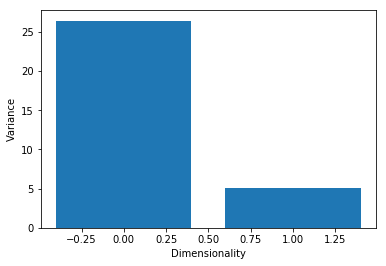

In [3]:
n=2 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(data1)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

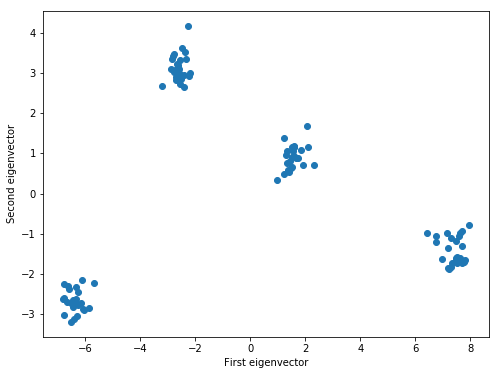

In [4]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

**the number of clusters we could have:** Four

**b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)**

In [5]:
#Use package from sklearn.
from sklearn.cluster import KMeans

n=4 # number of clusters
dd=Xproj #data
#tar=y # real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


**c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)**

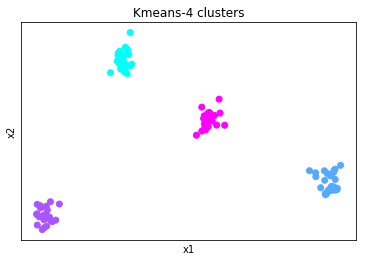

In [6]:
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

**d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)**


In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X=Xproj
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.595555597621
For n_clusters =3, the average silhouette_score is :0.762249337121
For n_clusters =4, the average silhouette_score is :0.901909648372
For n_clusters =5, the average silhouette_score is :0.782344408352


**From the result of silhouette_score, we should choose k=4, which has the highest silhouette_score.**

In [8]:
from scipy.spatial.distance import cdist, pdist
#from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

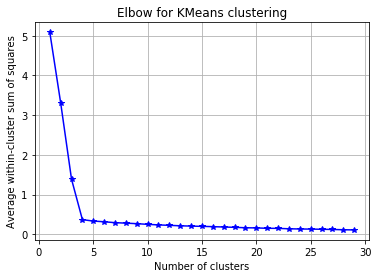

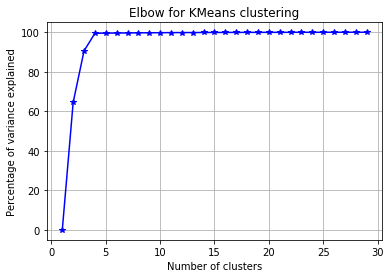

In [9]:
elbow(Xproj, range(1,30))

**From the result of Elbow method, we should choose k=4.**

**e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)**

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


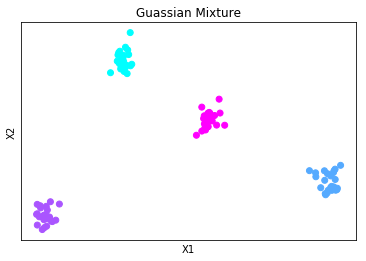

In [10]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.

n=4 # number of clusters
dd=Xproj #data

gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)
print(res1.predict(dd))

plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

In [81]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


**a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)**
\* You may first have to factorize the data set, as it contains string variables.

In [82]:
for i in data2.keys():
    data2[i] = pd.to_numeric(data2[i],errors=coerce)
data2.dropna(axis=1,inplace=True)

In [83]:
data2.head()

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,UNIQUE KEY
0,0,0,0,0,0,0,0,0,3781862
1,0,0,0,0,0,0,0,0,3781130
2,1,0,1,0,0,0,0,0,3781009
3,0,0,0,0,0,0,0,0,3780501
4,0,0,0,0,0,0,0,0,3780511


In [84]:
len(data2)

680

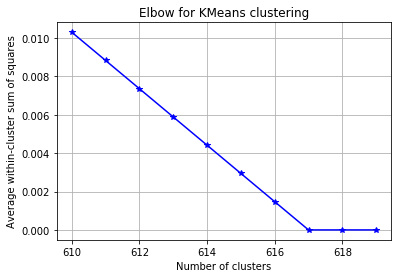

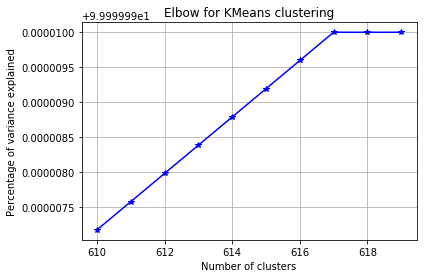

In [85]:
elbow(data2, range(610,620))

**Explaination:** Transfer all the columns in Dataset to float and drop the columns which contains NaN. Use Elbow method used in Q1 to run clustering. Both the plots show that the average with-in-cluster sum of square and percentage of variance explained are not changed after number of clusters is over 617. So we can conclude that the exact number of unique records is **617**.

**b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose. How well did your clustering technique perform? (4 pts)**

In [15]:
d = data2.drop_duplicates()
len(d)

617

After apply function drop_duplicates(), the length of data is updated to **617**, which is the same as my clustering outcome.

## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* a) it is a square matrix
* b) it is symmetrical
* c) it has dimensions $3\times3$
* d) it reports the size of each class in the test set
* e) it reports the total size of the training set
* f) it reports the number of observations the classifier assigned to each class
* g) it reports the proportion of correct predictions across the test set

**Answer:**  a,d,f,g

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [88]:
data4 = pd.read_csv('hw4data4.csv')

In [89]:
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


In [90]:
#from sklearn.model_selection import train_test_split
#train, test = train_test_split(data4, test_size=1./2)

train, test = data4[:100], data4[100:]

In [91]:
len(train),len(test)

(100, 100)

**a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)**

In [92]:
lr = LogisticRegression(C=10000)

**b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)**

In [93]:
lr.fit(train[['x1','x2','x3']], train['y'])
print("The fitted parameters are: {}, {}, {}\nThe intercept is: {}".format(lr.coef_[0][0],lr.coef_[0][1],
                                                                           lr.coef_[0][2],lr.intercept_[0]))

The fitted parameters are: -27.4477585713, -73.6115828598, -22.6289295145
The intercept is: -1.26536347384


**c) Use your trained model to predict labels for the test data. (3 pts)**

In [95]:
pre = lr.predict(test[['x1','x2','x3']])
print(pre)

[0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1]


**d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)**


In [96]:
xplot = np.arange(test['x1'].min(),test['x1'].max())
yplot = np.arange(test['x2'].min(),test['x2'].max())
xplot, yplot = np.meshgrid(xplot,yplot)
zplot = -(lr.intercept_[0] + lr.coef_[0][0]*xplot + lr.coef_[0][1]*yplot)/lr.coef_[0][2]

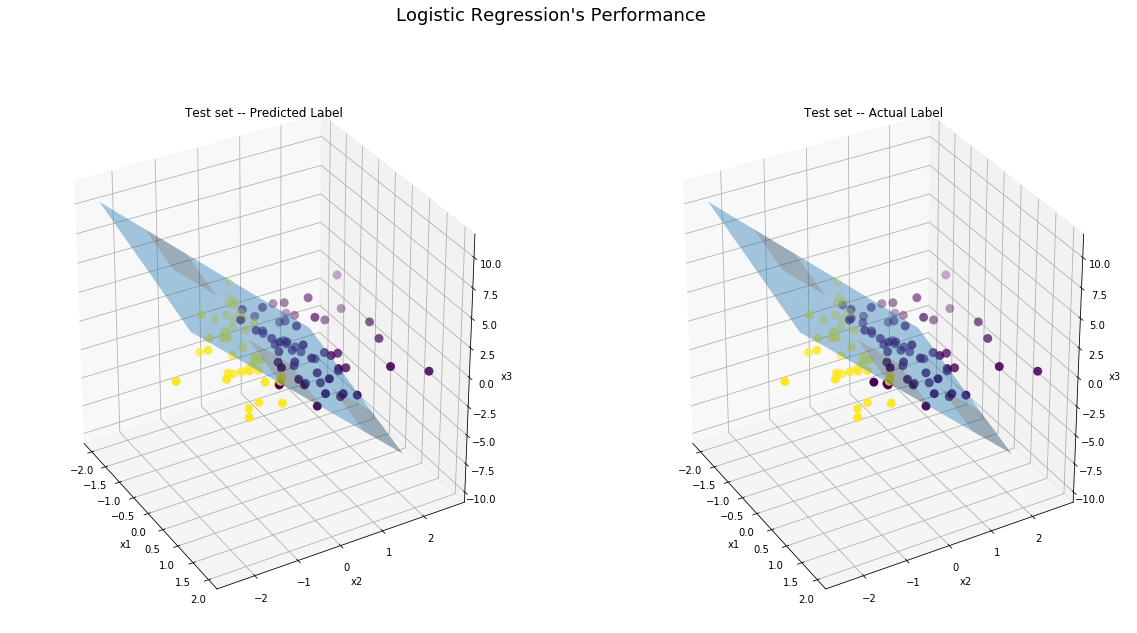

In [97]:
fig = plt.figure(figsize = (20,10))
plt.suptitle("Logistic Regression's Performance", fontsize = 18)
ax1, ax2 = fig.add_subplot(121,projection='3d'), fig.add_subplot(122,projection='3d')

ax1.plot_surface(xplot,yplot,zplot,alpha=0.4)
ax1.set(title='Test set -- Predicted Label', xlabel = 'x1', ylabel = 'x2',zlabel = 'x3')
ax1.scatter(test.x1, test.x2, test.x3, lw = 0, s = 80, c = pre)

ax2.plot_surface(xplot,yplot,zplot,alpha=0.4)
ax2.set(title='Test set -- Actual Label', xlabel = 'x1', ylabel = 'x2', zlabel = 'x3')
ax2.scatter(test.x1, test.x2, test.x3, lw = 0, s = 80, c = test.y)

#print ax1.azim
ax1.view_init(azim=-30)
ax2.view_init(azim=-30)
plt.show()

**e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)**

In [98]:
#compute TP,FP,FN,TN for the above classification
TP = sum((pre==1)&(test.y==1))
FP = sum((pre==1)&(test.y==0))
FN = sum((pre==0)&(test.y==1))
TN = sum((pre==0)&(test.y==0))
print(TP,FP,FN,TN)
#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

(37, 5, 0, 58)
Precision = 88.10%
Accuracy = 95.00%
Recall = 100.00%


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

**a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)**

In [50]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
Y = iris.target
data_i=pd.DataFrame((X))
data_i.columns=["Sepal_lenth","Sepal_width","Petal_length","Petal_width"]
data_i.head()

,Sepal_lenth,Sepal_width,Petal_length,Petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)**


In [51]:
lr = LogisticRegression(C=1e6,max_iter=200)
lr.fit(data_i[["Sepal_lenth","Sepal_width","Petal_length","Petal_width"]], Y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

**c) Use the model to predict class labels for the same data on which it was trained. (2 pts)**

In [52]:
pre = lr.predict(data_i[["Sepal_lenth","Sepal_width","Petal_length","Petal_width"]])
print(pre)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**d) Calculate and print out the multi-class (3 ×× 3) confusion matrix. (5 pts)**

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pre, Y))

[[50  0  0]
 [ 0 48  1]
 [ 0  2 49]]


/usr/local/lib/python2.7/site-packages/scipy/sparse/coo.py:200: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  if np.rank(self.data) != 1 or np.rank(self.row) != 1 or np.rank(self.col) != 1:


**e) Based on the confusion matrix you've obtained, calculate: (2 pts)**

i) the precision with respect to the class labeled 0

ii) the model's overall accuracy

In [73]:
TP_0, TN_0, FP_0, FN_0 = 50, 100, 0, 0
TP_1, TN_1, FP_1, FN_1 = 48, 99, 2, 1
TP_2, TN_2, FP_2, FN_2 = 49, 98, 1, 2

precision_0 = 100.0 * TP_0/(TP_0+FP_0)
overall_accu = 100.0 * (TP_0 + TP_1 + TP_2) / 150

print("the precision with respect to the class labeled 0:%.2f%%\nthe model's overall accuracy:%.2f%%"%(precision_0,
                                                                                                    overall_accu))

the precision with respect to the class labeled 0:100.00%
the model's overall accuracy:98.00%


**f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification. (4 pts)**

[ 0.92461621  0.05301557]


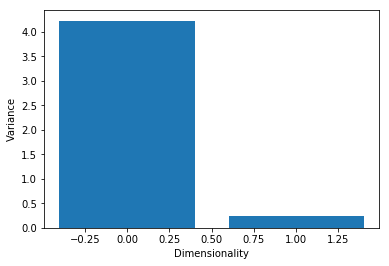

In [55]:
n=2 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(data_i)
eigenvalues = pca.explained_variance_
print pca.explained_variance_ratio_
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

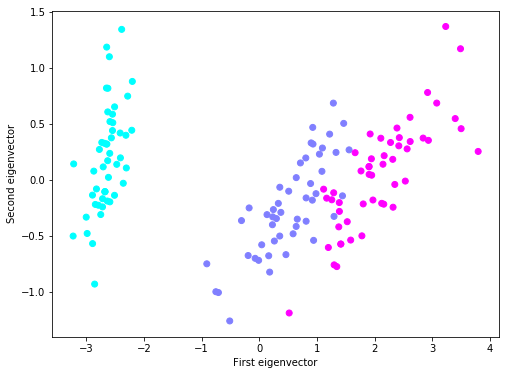

In [56]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], cmap=plt.cm.cool, c=pre)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()